## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import camera_parameters
from relative_pose_estimator import RelativePoseEstimator

## 1- Get Camera Parameters

In [2]:
cp = camera_parameters.CameraParameters(display = True)

 Camera matrix:
[[762.97423878   0.         958.41482973]
 [  0.         759.93736391 538.25401047]
 [  0.           0.           1.        ]]


## 2- Load Images

In [3]:
img1 = cv2.imread('data/img1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('data/img2.png', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('data/img3.png', cv2.IMREAD_GRAYSCALE)
print(img1.shape)

(1080, 1920)


## 3 - Initialization

In [4]:
# Initialize tracker and get feature points from the first frame
pose_estimator = RelativePoseEstimator(cp, img1)
poses = []

## 4 - Estimate Relative Camera Pose

In [5]:
# Pose in img2 relative to img1
pose = pose_estimator.process_next(img2)
poses.append(pose)
print(f'translation:\n{pose[0]}\nrotation:\n{pose[1]}')

translation:
[0.79122082 0.00162088 0.6115284 ]
rotation:
[ 0.00036276 -0.00638585 -0.00061673]


In [6]:
# Pose in img3 relative to img2
pose = pose_estimator.process_next(img3)
poses.append(pose)
print(f'translation:\n{pose[0]}\nrotation:\n{pose[1]}')

translation:
[-0.46403523 -0.20999017  0.86056692]
rotation:
[-0.02107321  0.24349541  0.03245208]


## 5- Plot Trajectory

In [7]:
# Get x and z translations
x_trajectory = [0]
z_trajectory = [0]

# Accumulate poses to make them relative to the first frame(img1)
for p in poses:
    x_trajectory.append(x_trajectory[-1] + p[0][0])
    z_trajectory.append(z_trajectory[-1] + p[0][2])

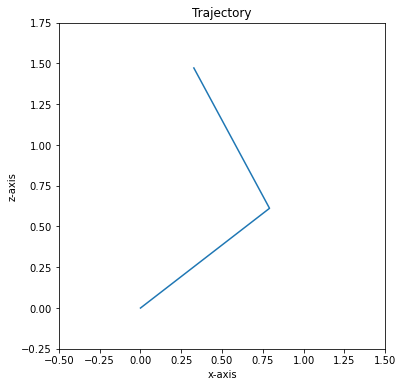

In [14]:
fig = plt.figure(figsize = (6, 6))
plt.plot(x_trajectory, z_trajectory)
plt.title('Trajectory')
plt.xlabel('x-axis')
plt.ylabel('z-axis')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.25, 1.75])
plt.gca().set_aspect('equal')